In [16]:
rm(list=ls())
load("Fig3_A_C.RData")
ls()
Baka_KHS_meQTL <- Baka_KHS
Himba_KHS_meQTL <- Himba_KHS
Himba_Baka_meQTL <- Himba_Baka
load("Fig3_D_F.RData")
Baka_KHS_hsq <- Baka_KHS
Himba_KHS_hsq <- Himba_KHS
Himba_Baka_hsq <- Himba_Baka

load("Fig3_G_I.RData")
ls()
Baka_KHS_weights <- Baka_KHS_summary
Himba_KHS_weights <- Himba_KHS_summary
Himba_Baka_weights <- Himba_Baka_summary


[1] "Baka_KHS"   "Himba_Baka" "Himba_KHS"

[1] "Baka_KHS"           "Baka_KHS_hsq"       "Baka_KHS_meQTL"    
 [4] "Baka_KHS_summary"   "Himba_Baka"         "Himba_Baka_hsq"    
 [7] "Himba_Baka_meQTL"   "Himba_Baka_summary" "Himba_KHS"         
[10] "Himba_KHS_hsq"      "Himba_KHS_meQTL"    "Himba_KHS_summary"

In [17]:
library(dplyr)
library(tibble)
library(ggplot2)
library(cowplot)
options(warn = -1) 
options(repr.plot.width = 18, repr.plot.height = 5)

#pop colors same as figure 1######################
popColours <- c("Himba" = rgb(213/255, 94/255, 0/255), # red
                "KHS" = rgb(204/255, 121/255, 167/255), # purple/magenta
                "Baka" = rgb(230/255, 159/255, 0/255))
         
###############################################
##### KHS vs Baka###
Baka_KHS_meQTL$comparison <- rep("Baka vs \u2021Khomani San", nrow(Baka_KHS_meQTL))
Himba_KHS_meQTL$comparison <- rep("Himba vs \u2021Khomani San", nrow(Himba_KHS_meQTL))
Himba_Baka_meQTL$comparison <- rep("Himba vs Baka", nrow(Himba_Baka_meQTL))



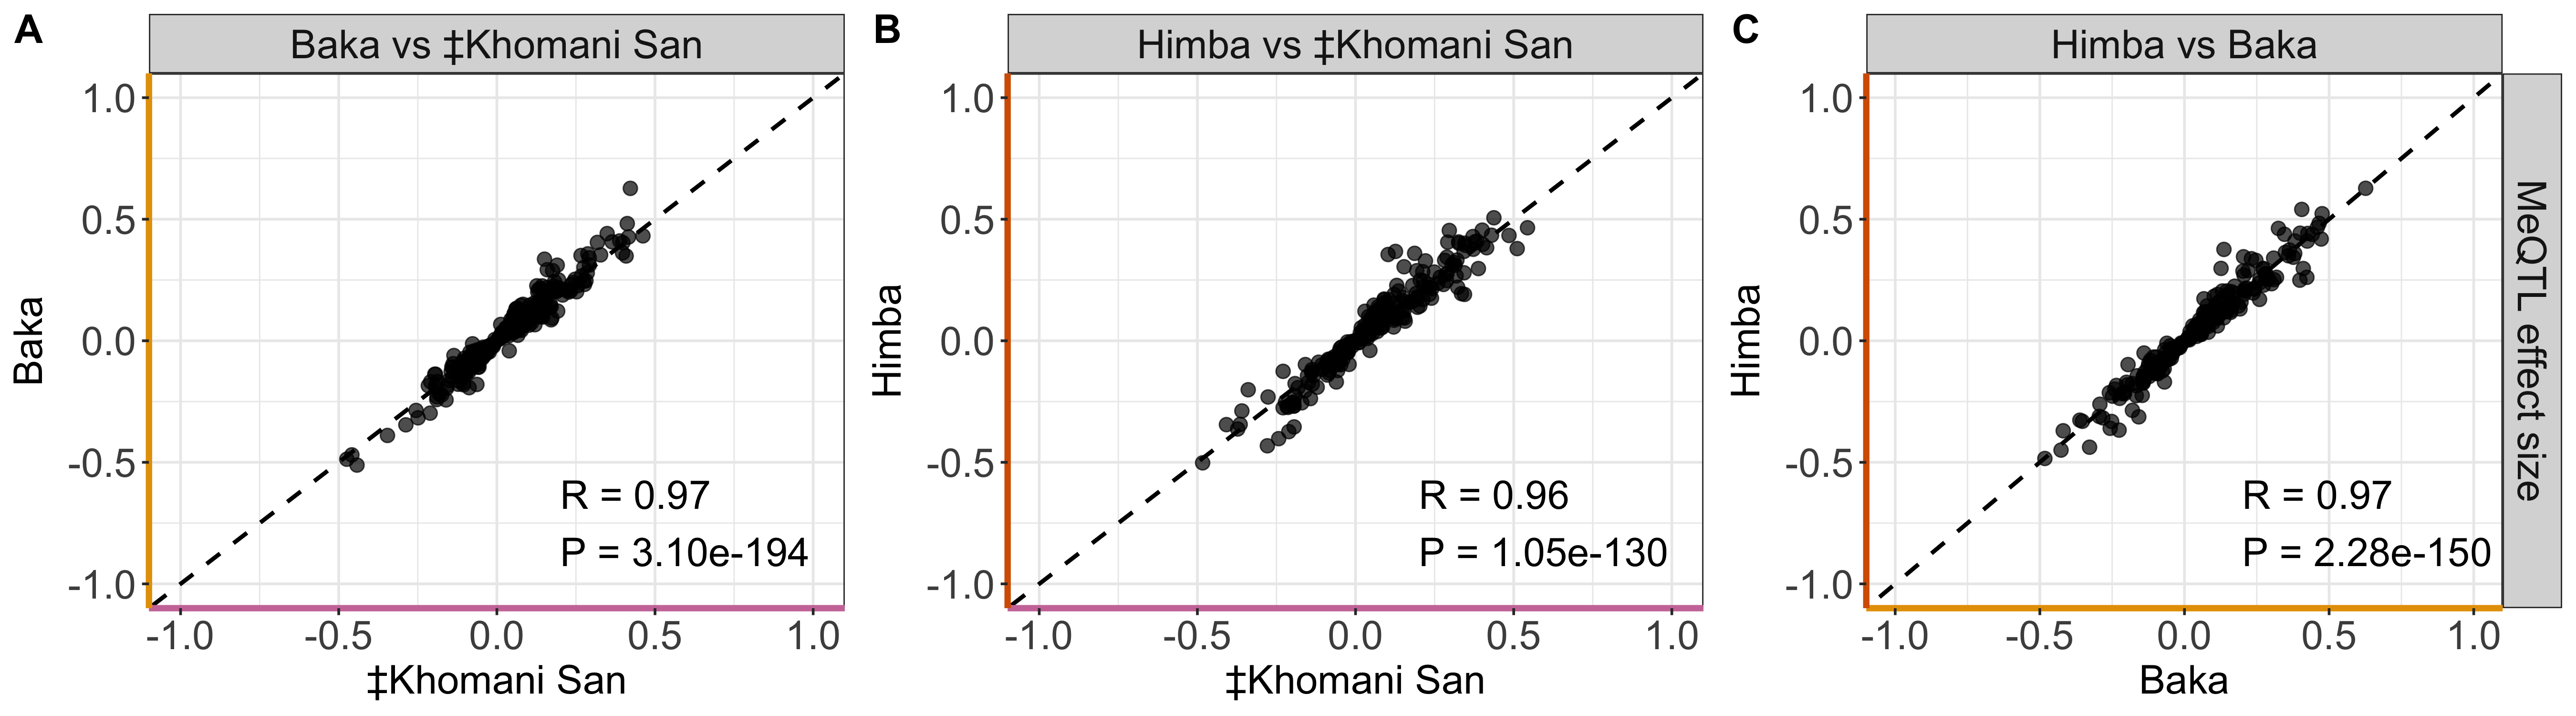

In [18]:
library(ggplot2)
library(cowplot)

# Calculate correlations and p-values
cor_test1 <- cor.test(Baka_KHS_meQTL$Baka_weight, Baka_KHS_meQTL$KHS_weight, use = "complete.obs")
cor_test2 <- cor.test(Himba_KHS_meQTL$Himba_weight, Himba_KHS_meQTL$KHS_weight, use = "complete.obs")
cor_test3 <- cor.test(Himba_Baka_meQTL$Himba_weight, Himba_Baka_meQTL$Baka_weight, use = "complete.obs")

# Plot 1: Baka vs KHS
plot1 <- ggplot(Baka_KHS_meQTL, aes(x = KHS_weight, y = Baka_weight)) +
  geom_point(color = "black", alpha = 0.7, size = 3) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Baka", x = "\u2021Khomani San") +
  coord_cartesian(xlim = c(-1, 1), ylim = c(-1, 1)) +
  theme_bw(base_size = 14) +
  theme(
    strip.text = element_text(size = 20),
    axis.line.y = element_line(colour = popColours["Baka"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20)
  ) +
  facet_wrap(~comparison, scales = "free") +
  annotate(
    "text",
    x = 0.2, y = -0.75,
    label = paste0(
      "R = ", round(cor_test1$estimate, 2), "\nP = ", formatC(cor_test1$p.value, format = "e", digits = 2)
    ),
    size = 7, color = "black", hjust = 0
  )

# Plot 2: Himba vs KHS
plot2 <- ggplot(Himba_KHS_meQTL, aes(x = KHS_weight, y = Himba_weight)) +
  geom_point(color = "black", alpha = 0.7, size = 3) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Himba", x = "\u2021Khomani San") +
  facet_wrap(~comparison, scales = "free") +
  coord_cartesian(xlim = c(-1, 1), ylim = c(-1, 1)) +
  theme_bw(base_size = 14) +
  theme(
    strip.text = element_text(size = 20),
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20)
  ) +
  annotate(
    "text",
    x = 0.2, y = -0.75,
    label = paste0(
      "R = ", round(cor_test2$estimate, 2), "\nP = ", formatC(cor_test2$p.value, format = "e", digits = 2)
    ),
    size = 7, color = "black", hjust = 0
  )

# Plot 3: Himba vs Baka
plot3 <- ggplot(Himba_Baka_meQTL, aes(x = Baka_weight, y = Himba_weight)) +
  geom_point(color = "black", alpha = 0.7, size = 3) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Himba", x = "Baka") +
  facet_grid("MeQTL effect size" ~ comparison, scales = "free") +
  coord_cartesian(xlim = c(-1, 1), ylim = c(-1, 1)) +
  theme_bw(base_size = 14) +
  theme(
    strip.text = element_text(size = 20),
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["Baka"], size = 1.5),
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20)
  ) +
  annotate(
    "text",
    x = 0.2, y = -0.75,
    label = paste0(
      "R = ", round(cor_test3$estimate, 2), "\nP = ", formatC(cor_test3$p.value, format = "e", digits = 2)
    ),
    size = 7, color = "black", hjust = 0
  )

# Combine plots
fig3_row1 <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("A", "B", "C"), label_size = 20, rel_widths = c(1, 1, 1))

# Display
fig3_row1


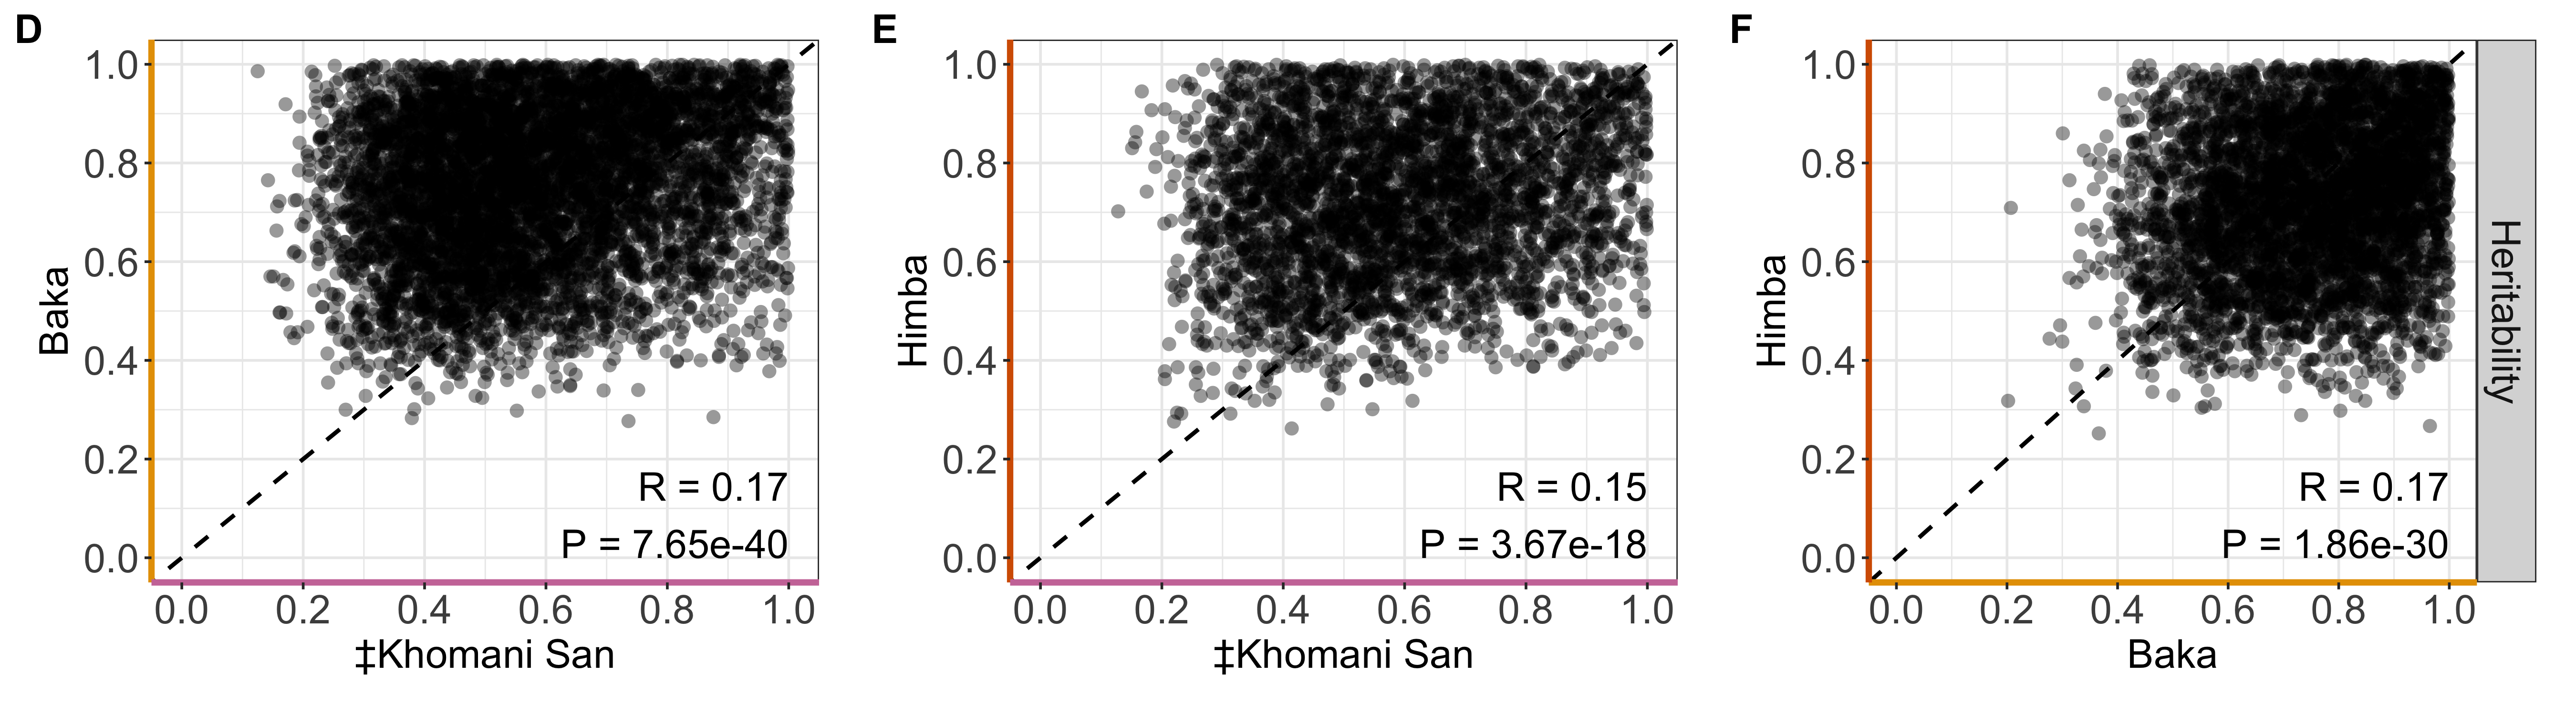

In [19]:

# Compute correlation tests for R and p-value
cor_hsq1 <- cor.test(Baka_KHS_hsq$Baka_hsq, Baka_KHS_hsq$KHS_hsq, use = "complete.obs")
cor_hsq2 <- cor.test(Himba_KHS_hsq$Himba_hsq, Himba_KHS_hsq$KHS_hsq, use = "complete.obs")
cor_hsq3 <- cor.test(Himba_Baka_hsq$Himba_hsq, Himba_Baka_hsq$Baka_hsq, use = "complete.obs")

# Plot 1: Baka vs KHS
plot1 <- ggplot(Baka_KHS_hsq, aes(x = KHS_hsq, y = Baka_hsq)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Baka", x = "\u2021Khomani San") +
  coord_cartesian(xlim = c(0, 1), ylim = c(0, 1)) +
  theme_bw(base_size = 14) +
  theme(
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Baka"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +
  annotate(
    "text",
    x = 1,
    y = 0,
    label = paste0(
      "R = ", round(cor_hsq1$estimate, 2), "\nP = ", formatC(cor_hsq1$p.value, format = "e", digits = 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,
    vjust = 0
  )

# Plot 2: Himba vs KHS
plot2 <- ggplot(Himba_KHS_hsq, aes(x = KHS_hsq, y = Himba_hsq)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Himba", x = "\u2021Khomani San") +
  coord_cartesian(xlim = c(0, 1), ylim = c(0, 1)) +
  theme_bw(base_size = 14) +
  theme(
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +
  annotate(
    "text",
    x = 1,
    y = 0,
    label = paste0(
      "R = ", round(cor_hsq2$estimate, 2), "\nP = ", formatC(cor_hsq2$p.value, format = "e", digits = 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,
    vjust = 0
  )

# Plot 3: Himba vs Baka
plot3 <- ggplot(Himba_Baka_hsq, aes(x = Baka_hsq, y = Himba_hsq)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Himba", x = "Baka") +
  facet_grid("Heritability" ~ ., scales = "free") +
  coord_cartesian(xlim = c(0, 1), ylim = c(0, 1)) +
  theme_bw(base_size = 14) +
  theme(
    strip.text = element_text(size = 20),
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["Baka"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, by = 0.2)) +
  annotate(
    "text",
    x = 1,
    y = 0,
    label = paste0(
      "R = ", round(cor_hsq3$estimate, 2), "\nP = ", formatC(cor_hsq3$p.value, format = "e", digits = 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,
    vjust = 0
  )

# Combine into a single row
fig3_row2 <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("D", "E", "F"), label_size = 20, rel_widths = c(1, 1, 1))

# Display
fig3_row2


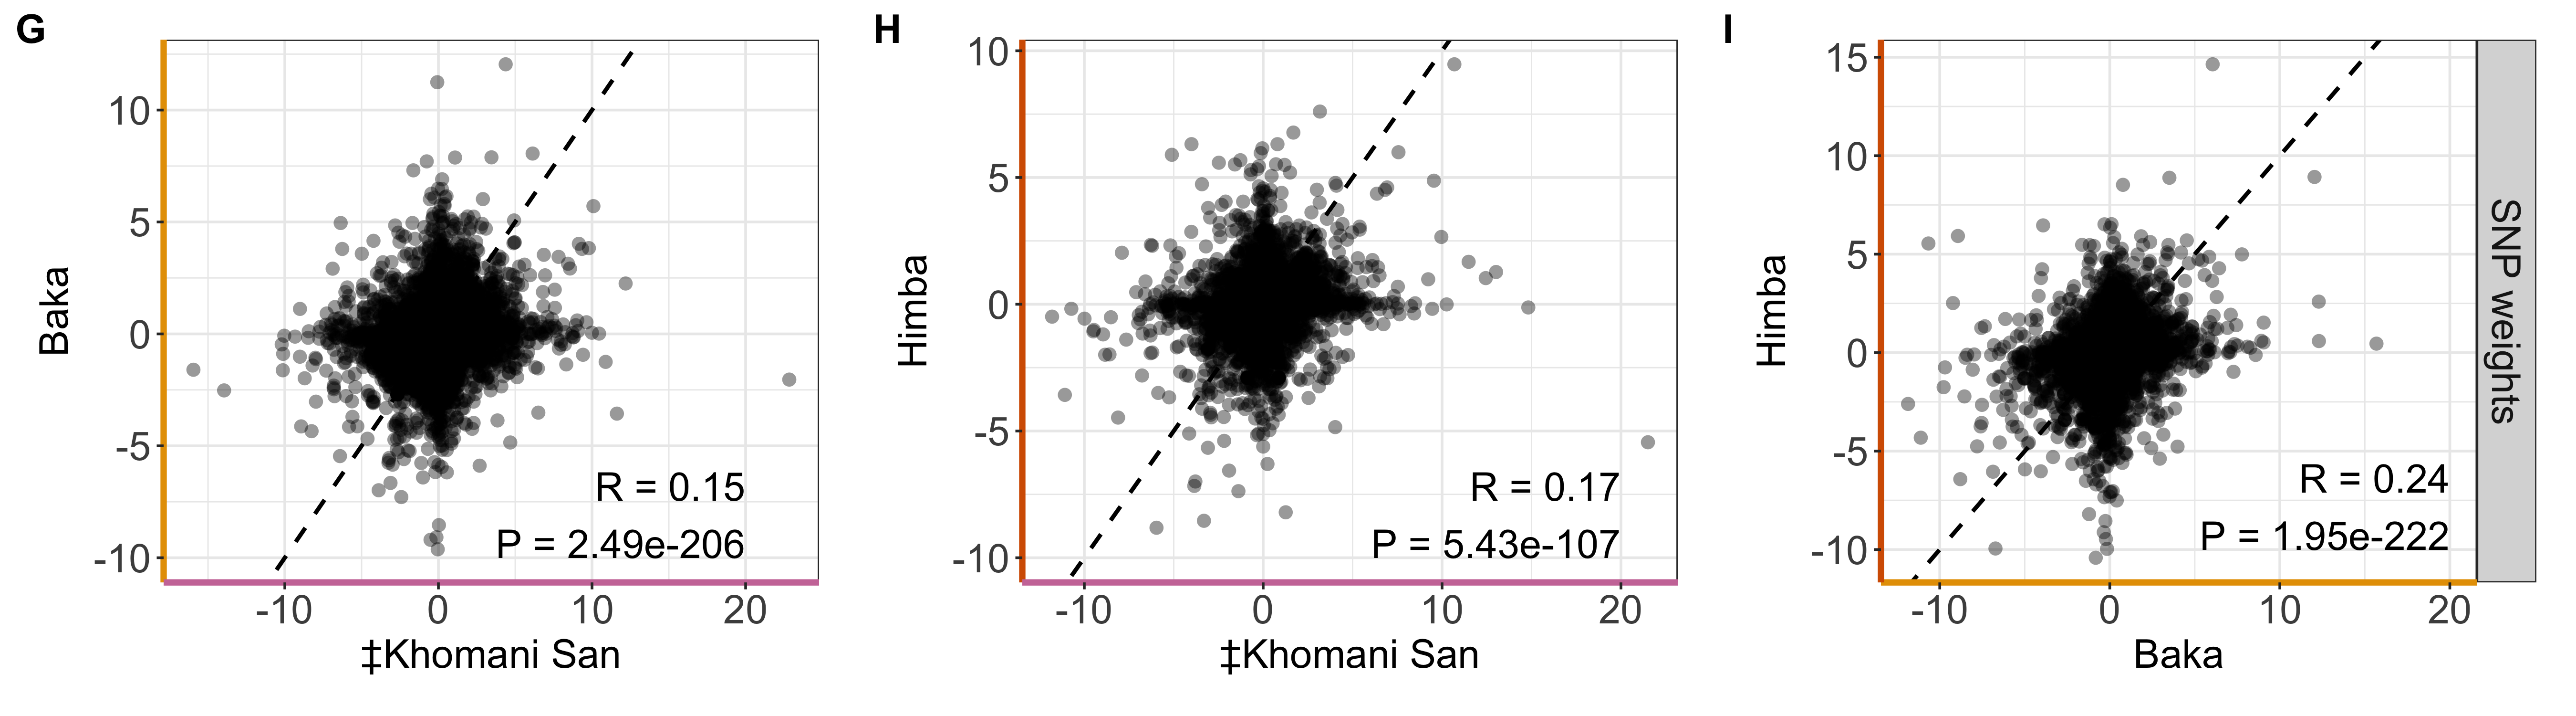

In [20]:
# Correlation tests
cor_weights1 <- cor.test(Baka_KHS_weights$scaled_effect_Baka, Baka_KHS_weights$scaled_effect_KHS, use = "complete.obs")
cor_weights2 <- cor.test(Himba_KHS_weights$scaled_effect_Himba, Himba_KHS_weights$scaled_effect_KHS, use = "complete.obs")
cor_weights3 <- cor.test(Himba_Baka_weights$scaled_effect_Himba, Himba_Baka_weights$scaled_effect_Baka, use = "complete.obs")

# Plot 1
plot1 <- ggplot(Baka_KHS_weights, aes(x = scaled_effect_KHS, y = scaled_effect_Baka)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Baka", x = "\u2021Khomani San") +
  theme_bw(base_size = 14) +
  theme(
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Baka"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  annotate(
    "text",
    x = 20,
    y = -10,
    label = paste0(
      "R = ", round(cor_weights1$estimate, 2), "\nP = ", formatC(cor_weights1$p.value, format = "e", digits = 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,
    vjust = 0
  )

# Plot 2
plot2 <- ggplot(Himba_KHS_weights, aes(x = scaled_effect_KHS, y = scaled_effect_Himba)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Himba", x = "\u2021Khomani San") +
  theme_bw(base_size = 14) +
  theme(
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["KHS"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  annotate(
    "text",
    x = 20,
    y = -10,
    label = paste0(
      "R = ", round(cor_weights2$estimate, 2), "\nP = ", formatC(cor_weights2$p.value, format = "e", digits = 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,
    vjust = 0
  )

# Plot 3
plot3 <- ggplot(Himba_Baka_weights, aes(x = scaled_effect_Baka, y = scaled_effect_Himba)) +
  geom_point(size = 3, alpha = 0.4, pch = 16) +
  geom_abline(colour = "black", slope = 1, linetype = "dashed", size = 1) +
  labs(y = "Himba", x = "Baka") +
  facet_grid("SNP weights" ~ ., scales = "free") +
  theme_bw(base_size = 14) +
  theme(
    strip.text = element_text(size = 20),
    legend.position = "none",
    axis.line.y = element_line(colour = popColours["Himba"], size = 1.5),
    axis.line.x = element_line(colour = popColours["Baka"], size = 1.5),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 20),
    plot.title = element_text(size = 50),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
  ) +
  annotate(
    "text",
    x = 20,
    y = -10,
    label = paste0(
      "R = ", round(cor_weights3$estimate, 2), "\nP = ", formatC(cor_weights3$p.value, format = "e", digits = 2)
    ),
    size = 7,
    color = "black",
    hjust = 1,
    vjust = 0
  )

# Combine into row
fig3_row3 <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("G", "H", "I"), label_size = 20, rel_widths = c(1, 1, 1))

# Display
fig3_row3


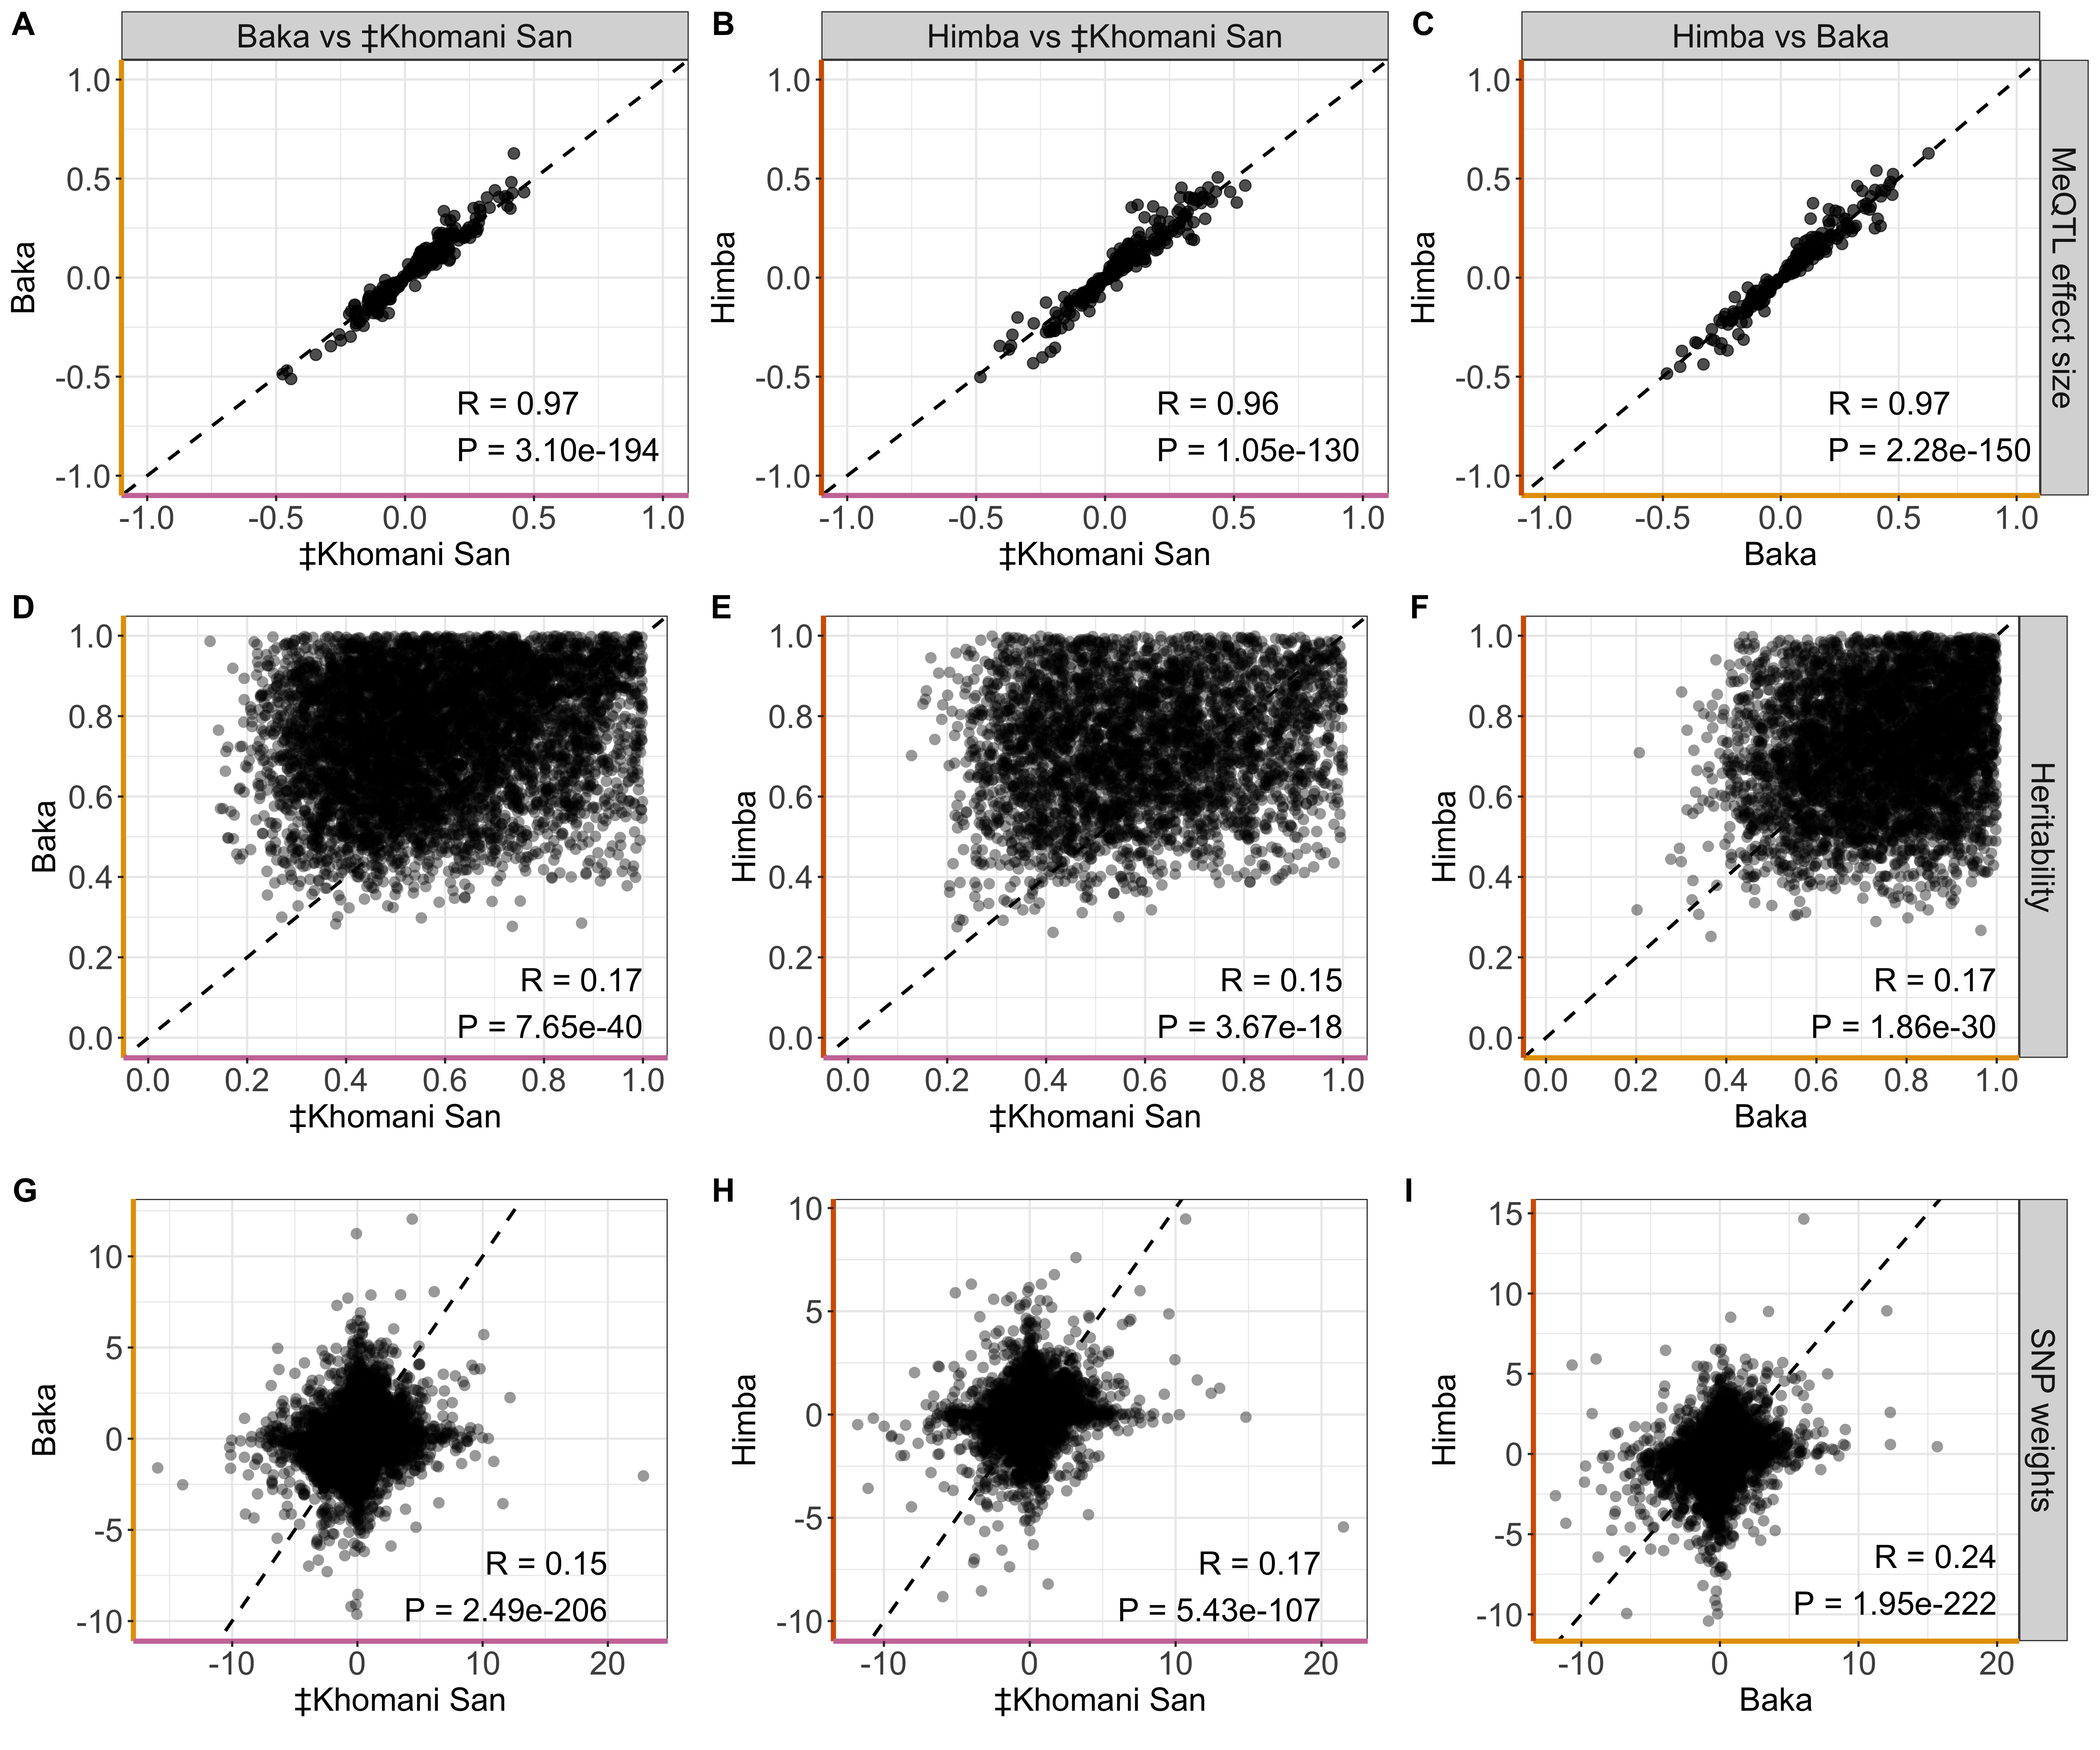

In [21]:
options(repr.plot.width = 18, repr.plot.height = 15, repr.plot.res = 300)
plot_grid(fig3_row1, fig3_row2, fig3_row3, nrow=3)